In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('Book1.csv',index_col='portname')
# changing the column names for convenience
data.columns = list(map(str.lower, data.columns.values.tolist()))

In [3]:
data.head()

,state,portcode,border,measure,value,location
portname,,,,,,
Calexico East,California,2507,US-Mexico Border,Trucks,34447,POINT (-115.48433000000001 32.67524)
Van Buren,Maine,108,US-Canada Border,Rail Containers Full,428,POINT (-67.94271 47.16207)
Otay Mesa,California,2506,US-Mexico Border,Trucks,81217,POINT (-117.05333 32.57333)
Nogales,Arizona,2604,US-Mexico Border,Trains,62,POINT (-110.93361 31.340279999999996)
Trout River,New York,715,US-Canada Border,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


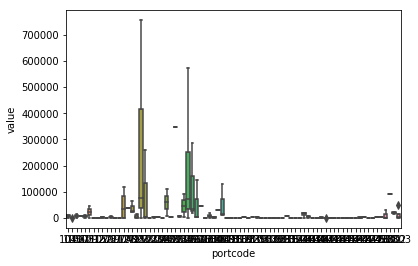

In [4]:
sb.boxplot(x='portcode', y='value', data=data)

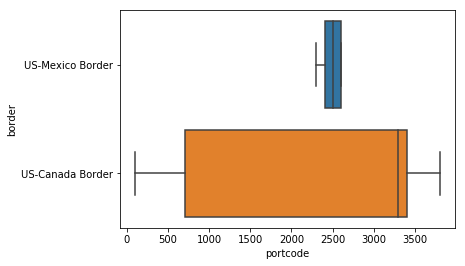

In [5]:
sb.boxplot(x= 'portcode', y='border', data = data)

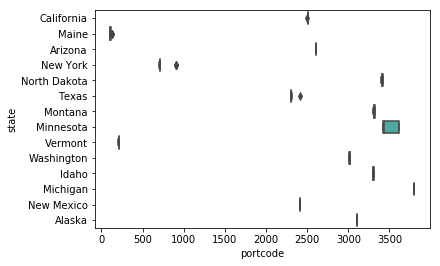

In [6]:
sb.boxplot(x= 'portcode', y= 'state', data = data)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


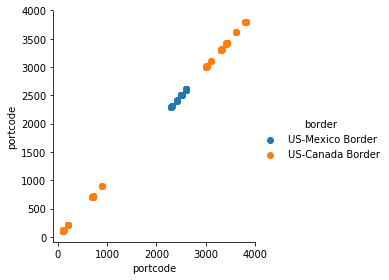

In [7]:
sb.FacetGrid(data, hue='border', size=4).\
                   map(plt.scatter, 'portcode',
                   'portcode').add_legend()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


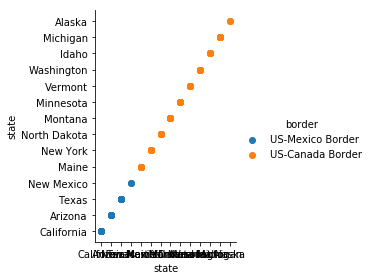

In [8]:
sb.FacetGrid(data, hue='border', size=4).\
                   map(plt.scatter, 'state',
                   'state').add_legend()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


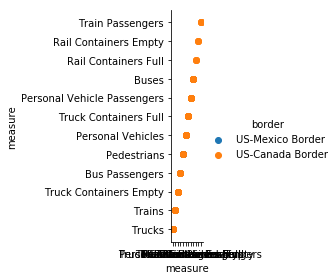

In [9]:
sb.FacetGrid(data, hue='border', size=4).\
                   map(plt.scatter, 'measure',
                   'measure').add_legend()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Now we know which features are most likely to contribute to our model
# so lets create a model and see the accuracy
X_train, X_test, Y_train, Y_test = train_test_split(
        data.loc[:, ['portcode', 'value']], 
        data.loc[:, 'border'])

knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')
knn.fit(X_train, Y_train)
print ("Training Accuracy {}".format(knn.score(X_train, Y_train)))
print ("Testing Accuracy {}".format(knn.score(X_test, Y_test)))

Training Accuracy 0.9017857142857143
Testing Accuracy 0.7894736842105263


In [12]:
from sklearn.tree import DecisionTreeClassifier
des=DecisionTreeClassifier()
des.fit(X_train,Y_train)
des.predict(X_test)
print("Training Accuracy {}".format(des.score(X_train,Y_train)))
print("Testing Accuracy {}".format(des.score(X_test,Y_test)))

Training Accuracy 1.0
Testing Accuracy 1.0
